In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [15]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv")

In [16]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [17]:
df.tail()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
25,92,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


In [18]:
df.to_csv("baseball_case_study.csv")

In [19]:
test_df = pd.read_csv("baseball_case_study.csv")
train_df = pd.read_csv("baseball_case_study.csv")

In [20]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  30 non-null     int64  
 1   W           30 non-null     int64  
 2   R           30 non-null     int64  
 3   AB          30 non-null     int64  
 4   H           30 non-null     int64  
 5   2B          30 non-null     int64  
 6   3B          30 non-null     int64  
 7   HR          30 non-null     int64  
 8   BB          30 non-null     int64  
 9   SO          30 non-null     int64  
 10  SB          30 non-null     int64  
 11  RA          30 non-null     int64  
 12  ER          30 non-null     int64  
 13  ERA         30 non-null     float64
 14  CG          30 non-null     int64  
 15  SHO         30 non-null     int64  
 16  SV          30 non-null     int64  
 17  E           30 non-null     int64  
dtypes: float64(1), int64(17)
memory usage: 4.3 KB


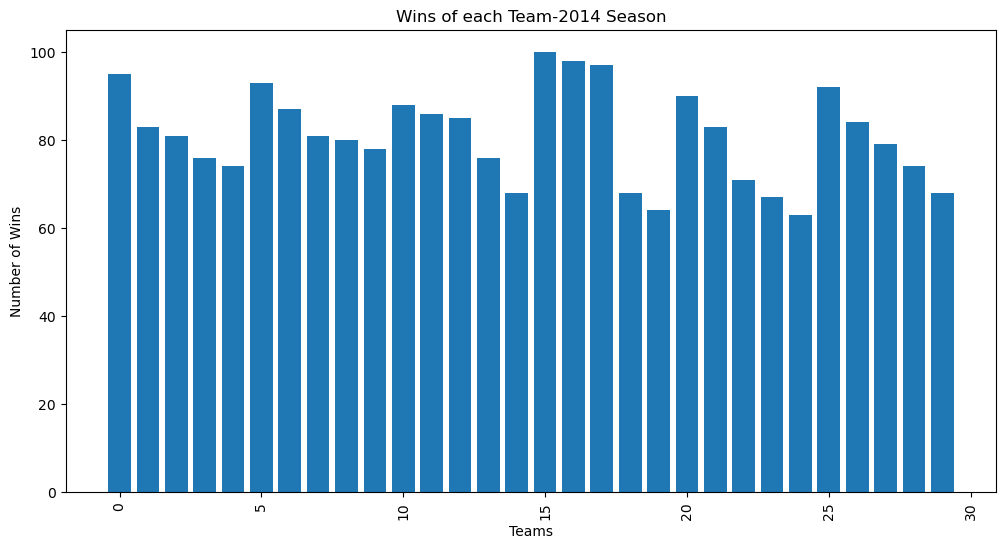

In [32]:
plt.figure(figsize=(12,6))
plt.bar(df.index,df['W'])
plt.xlabel("Teams")
plt.ylabel('Number of Wins')
plt.title('Wins of each Team-2014 Season')
plt.xticks(rotation='vertical')
plt.show()

In [67]:
X=df.drop("W",axis=1)
y=df["W"]
y=np.array(y)
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [68]:
pca=PCA(n_components=2)
X_pca=pca.fit_transform(X_scaled)

In [69]:
X_train,X_test,y_train,y_test= train_test_split(X_pca,y,test_size=0.2,random_state=42)

In [70]:
model= LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [71]:
y_pred=model.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

In [72]:
print("Mean Squared Error:",mse)
print("R Sruared Error:",r2)

Mean Squared Error: 11.29318113244274
R Sruared Error: 0.914174684237294


In [51]:
models= {"Linear Regression":LinearRegression(),"Decision Tree":DecisionTreeClassifier(),"Random Forest":RandomForestClassifier()}
for name, model in models.items():
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    mse=mean_squared_error(y_test,y_pred)
    r2=r2_score(y_test,y_pred)
    print(f"Model:{name}")
    print("Mean Squared Error:",mse)
    print("R Sruared Error:",r2)
    print("-"*30)

Model:Linear Regression
Mean Squared Error: 11.29318113244274
R Sruared Error: 0.914174684237294
------------------------------
Model:Decision Tree
Mean Squared Error: 52.0
R Sruared Error: 0.6048131728942369
------------------------------
Model:Random Forest
Mean Squared Error: 97.5
R Sruared Error: 0.25902469917669413
------------------------------


In [76]:
model=LinearRegression()
param_grid={"fit_intercept":[True,False]}

In [77]:
grid_search=GridSearchCV(model,param_grid, cv=5,scoring="neg_mean_squared_error")
grid_search.fit(X_train,y_train.ravel())
best_model=grid_search.best_estimator_
y_pred=best_model.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("Best Hyperparameters:",grid_search.best_params_)
print("Mean Squared Error:",mse)
print("R Sruared Error:",r2)

Best Hyperparameters: {'fit_intercept': True}
Mean Squared Error: 11.29318113244274
R Sruared Error: 0.914174684237294


In [28]:
train_df.describe()

,Unnamed: 0,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,14.500000,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,8.803408,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,0.000000,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,7.250000,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,14.500000,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,21.750000,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,29.000000,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [29]:
input_data_2015=pd.DataFrame({"R":[650],"AB":[5500],"H":[1400],"2B":[300],"3B":[20],"HR":[150],"BB":[500],"SO":[1000],"SB":[100],"RA":[700],"ER":[600],"ERA":[4.00],"CG":[5],"SHO":[8],"SV":[40],"E":[70]})

In [30]:
input_data_2015

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,650,5500,1400,300,20,150,500,1000,100,700,600,4.0,5,8,40,70


In [31]:
predicted_wins_2015=model.predict(input_data_2015)
print("Predicted Wins for the 2015 season:",predicted_wins_2015)

Predicted Wins for the 2015 season: [63.4954117]
